# Introduccion a aprendizaje por refuerzo

by. Fany Vega & Karla Doctor

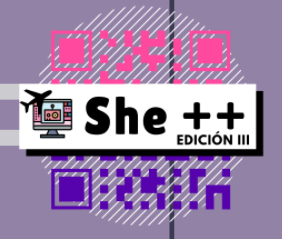

IMPORTANTE: En google colab funciona la version 
FrozenLake-v0, sin embargo para ejecutarlo como libreta de jupyter es necesario cambiar a FrozenLake-v1.


Bibliografía:


*   
Ravichandiran, S. (2020). Deep Reinforcement Learning with Python. Packt Publishing Ltd.
*   https://www.youtube.com/watch?v=Mut_u40Sqz4





# Estructura base

## Configuracion y familiarizacion con el entorno


In [ ]:
import gym                       # Librería "gym", entornos para entrenar agentes RL
env = gym.make("FrozenLake-v0")  # Creacion de entorno -> "FrozenLake-v0"
env.render()                     # Visualizacion de entorno


SFFF
FHFH
FFFH
HFFG


In [ ]:
print(env.observation_space)     # Espacio de estados, es decir, N° de estados.

Discrete(16)


In [ ]:
print(env.action_space)          # Espacio de acciones, es decir, n° de acciones posibles en el entorno.

Discrete(4)


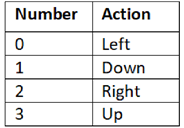

## Probabilidad de Transición y Recompensa

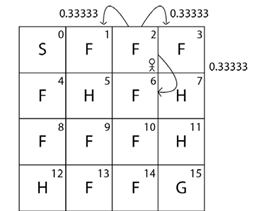

In [ ]:
print(env.P[2][1])                # Obtencion de probabilidad de transición y función de recompensa. 
print(env.P[3][1])                # [( probabilidad de transición,   siguiente  estado,  recompensa,  ¿Es el estado terminal?  )]

[(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 3, 0.0, False)]
[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 3, 0.0, False)]


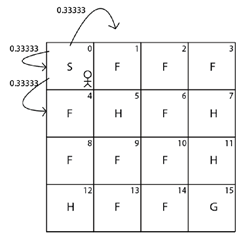

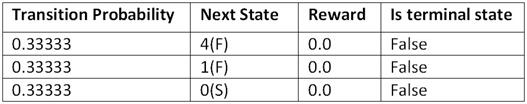

In [ ]:
state = env.reset()                 # Generacion de un nuevo episodio, reiniciando al estado inicial S.
env.render()


SFFF
FHFH
FFFH
HFFG


In [ ]:
env.step(0)                        # Se realiza una acción.
                                   # (next_state,  recompensa, es estado terminal?,  probabilidad de transición) 

(0, 0.0, False, {'prob': 0.3333333333333333})

In [ ]:
random_action = env.action_space.sample()                    # Muestrear la acción de nuestro espacio de acción y realizar una acción aleatoria  para  explorar  nuestro  entorno
                                                             # Selecciona aleatoriamente una acción mediante el muestreo desde el espacio de acción.
next_state, reward, done, info = env.step(random_action)     # Realiza la acción muestreada usando la función step
                                                             # Realiza la acción seleccionada

##Código Completo

In [ ]:
import gym
env = gym.make("FrozenLake-v0")
state = env.reset()

print('Estado inicial 0 :')
env.render()

i = 8000000

for t in range(i):
  random_action = env.action_space.sample()
  new_state, reward, done, info = env.step(random_action)
  print ('Estado {} :'.format(t+1))
  
  env.render()
  if done:
    break

Estado inicial 0 :

SFFF
FHFH
FFFH
HFFG
Estado 1 :
  (Right)
SFFF
FHFH
FFFH
HFFG
Estado 2 :
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 3 :
  (Down)
SFFF
FHFH
FFFH
HFFG
Estado 4 :
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 5 :
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 6 :
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 7 :
  (Down)
SFFF
FHFH
FFFH
HFFG
Estado 8 :
  (Down)
SFFF
FHFH
FFFH
HFFG


# Entrenando y Probando un modelo

## Importando dependencias

In [ ]:
import gym

## Cargando entorno

*   env.reset()   ->   Reinicia el entorno
*   env.render()  ->   Visualiza el entorno
*   env.step()    ->   Aplica la accion al entorno
*   env.close()   ->   Cierra la ventana emergente del entorno

In [ ]:
import gym
env = gym.make("FrozenLake-v0")
state = env.reset()
score = 0

print('Estado inicial 0 :')
env.render()

i = 80

for t in range(i):
  random_action = env.action_space.sample()
  new_state, reward, done, info = env.step(random_action)
  #1. Agregar el score en la variable hasta arriba y abajo de esta linea: print ('Estado {} :'.format(t+1))\
  score += reward
  print ('Estado {} Score {}:'.format(t+1, score))
  
  env.render()
  if done:
    break

Estado inicial 0 :

SFFF
FHFH
FFFH
HFFG
Estado 1 Score 0.0:
  (Up)
SFFF
FHFH
FFFH
HFFG
Estado 2 Score 0.0:
  (Down)
SFFF
FHFH
FFFH
HFFG
Estado 3 Score 0.0:
  (Down)
SFFF
FHFH
FFFH
HFFG


##Entrenamiento

In [ ]:
#Importacion de librerias
import os


In [ ]:
log_path = os.path.join('Training', 'Logs') #Crea los directorios

In [ ]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 174 kB 8.9 MB/s 


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [ ]:
model.learn(total_timesteps=200000)

Logging to Training/Logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 695  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 785         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008867152 |
|    clip_fraction        | 0.0384      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.363      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0167      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00775    |
|    value_loss           | 0.0183      |
-----------------------------------------
---

## Guardar modelo

In [ ]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_FrozenLake')
model.save(PPO_path)

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'Training/Saved Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


##Evaluacion

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)

(0.8, 0.4)

##Prueba

In [ ]:
obs = env.reset()
state, _ = model.predict(obs)

In [ ]:
import gym
env = gym.make("FrozenLake-v0")
#2. Ahora se trata de observaciones cambiar
#state = env.reset()
obs = env.reset()

print('Estado inicial 0 :')
env.render()

i = 100

for t in range(i):
  #1. Cambiar env.action_space.sample()
  #random_action = env.action_space.sample(obs)
  random_action, _ = model.predict(obs) #Ahora usando modelos aqui
  #Cambiar por obs
  obs, reward, done, info = env.step(random_action)
  print ('Estado {} score {}:'.format(t+1, score))
  score +=reward
  env.render()
  if done:
    break

Estado inicial 0 :

SFFF
FHFH
FFFH
HFFG
Estado 1 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 2 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 3 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 4 score 0.0:
  (Up)
SFFF
FHFH
FFFH
HFFG
Estado 5 score 0.0:
  (Down)
SFFF
FHFH
FFFH
HFFG
Estado 6 score 0.0:
  (Up)
SFFF
FHFH
FFFH
HFFG
Estado 7 score 0.0:
  (Down)
SFFF
FHFH
FFFH
HFFG
Estado 8 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 9 score 0.0:
  (Down)
SFFF
FHFH
FFFH
HFFG
Estado 10 score 0.0:
  (Up)
SFFF
FHFH
FFFH
HFFG
Estado 11 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 12 score 0.0:
  (Up)
SFFF
FHFH
FFFH
HFFG
Estado 13 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 14 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 15 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 16 score 0.0:
  (Up)
SFFF
FHFH
FFFH
HFFG
Estado 17 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 18 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 19 score 0.0:
  (Left)
SFFF
FHFH
FFFH
HFFG
Estado 20 score 0.0:
  (Left)

## en tensorflow

In [ ]:
training_log_path = os.path.join(log_path, 'PPO_1')

In [ ]:
training_log_path

'Training/Logs/PPO_1'

In [34]:
!python -m tensorboard.main --logdir={training_log_path}

2021-11-01 02:13:37.701129: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-01 02:13:37.701182: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (12626f47ac62): /proc/driver/nvidia/version does not exist

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
